In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/house-price-prediction-challenge")

print("Path to dataset files:", path)

100%|██████████| 2.13M/2.13M [00:00<00:00, 86.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anmolkumar/house-price-prediction-challenge/versions/1


In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/train.csv")
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [224]:
df.shape

(29451, 12)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [226]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [227]:
df.isnull().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


In [228]:
df.duplicated().sum()

401

In [229]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [230]:
df_columns = df.columns

for column in df_columns:
    print(f"Counts for {column}")
    print(df[column].value_counts())
    print("\n")

Counts for POSTED_BY
POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64


Counts for UNDER_CONSTRUCTION
UNDER_CONSTRUCTION
0    23851
1     5199
Name: count, dtype: int64


Counts for RERA
RERA
0    19874
1     9176
Name: count, dtype: int64


Counts for BHK_NO.
BHK_NO.
2     13164
3     10365
1      3540
4      1698
5       189
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64


Counts for BHK_OR_RK
BHK_OR_RK
BHK    29026
RK        24
Name: count, dtype: int64


Counts for SQUARE_FT
SQUARE_FT
1000.000000    473
1250.000000    289
800.000000     198
1200.000000    178
1600.000000    124
              ... 
3224.128965      1
2400.045177      1
1610.777566      1
794.407372       1
896.774194       1
Name: count, Length: 19561, dtype: int64


Counts for READY_TO_MOVE
READY_TO_MOVE
1    23851
0     5199
Name: count, dtype: int64


Counts for RESAL

In [231]:
processed_df = df.copy()

In [232]:
#hapus kolom dengan persebaran data yang sangat kecil (BHK_OR_RK)
processed_df.drop(columns=["BHK_OR_RK"], inplace=True)

In [233]:
#pisahkan address menjadi streetname dan city, city merupakan nilai setelah koma terakhir
city = processed_df["ADDRESS"].str.split(",").str[-1]
streetname = processed_df["ADDRESS"].str.split(",").str[:-1]
streetname = streetname.apply(lambda x: ", ".join(x))
processed_df["STREETNAME"] = streetname
processed_df["CITY"] = city
processed_df.drop(columns=["ADDRESS", "STREETNAME"], inplace=True)


processed_df['CITY'].value_counts()

,count
CITY,
Bangalore,4272
Lalitpur,2963
Mumbai,2006
Pune,1980
Noida,1718
...,...
Bhadrak,1
Kurukshetra,1
Dibrugarh,1


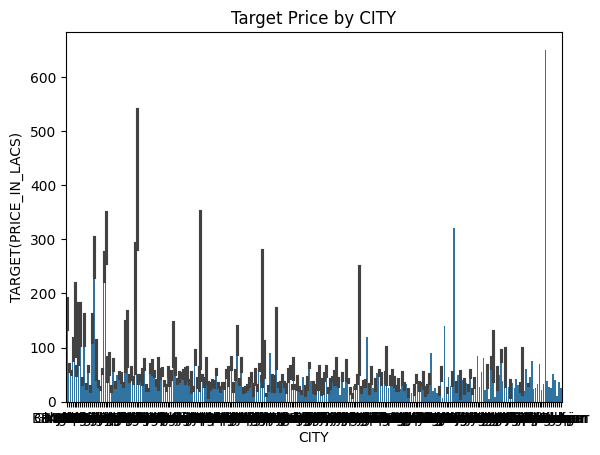

In [234]:
sns.barplot(x='CITY', y='TARGET(PRICE_IN_LACS)', data=processed_df)
plt.title('Target Price by CITY')
plt.show()

In [ ]:
# One-Hot Encoding untuk POSTED_BY dan BHK_OR_RK
heatmap_df = pd.get_dummies(processed_df, columns=["POSTED_BY"], drop_first=True)
heatmap_df.drop(columns=["CITY"], inplace=True)
heatmap_df

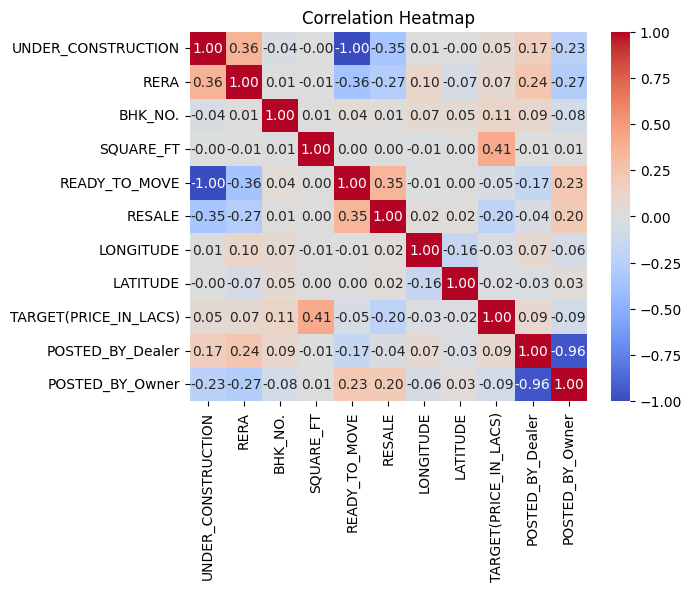

In [328]:
# Hitung korelasi
corr = heatmap_df[heatmap_df.columns].corr()

# Visualisasi heatmap korelasi
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [369]:
encoded_df = pd.get_dummies(processed_df, dtype=float, drop_first=True)
encoded_df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,...,CITY_Vellore,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim,CITY_Yavatmal
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [357]:
# Pisahkan fitur (X) dan target (y)
x = encoded_df.drop(columns=["TARGET(PRICE_IN_LACS)"])
y = encoded_df["TARGET(PRICE_IN_LACS)"]

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [363]:
# Split data menjadi train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [364]:
# Bangun model Linear Regression
LR = LinearRegression()
LR.fit(x_train, y_train)

DT= DecisionTreeRegressor(max_depth = 5)
DT.fit(x_train, y_train)

RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [367]:
print("====== TRAIN SCORE ======")
print(f"Linear Regression Train Score {LR.score(x_train, y_train)}")
print(f"Decision Tree Train Score {DT.score(x_train, y_train)}")
print(f"Random Forest Train Score {RF.score(x_train, y_train)}")

print("\n ====== TEST SCORE ======")
print(f"Linear Regression Test Score {LR.score(x_test, y_test)}")
print(f"Decision Tree Test Score {DT.score(x_test, y_test)}")
print(f"Random Forest Test Score {RF.score(x_test, y_test)}")

====== TRAIN SCORE ======
Linear Regression Train Score 0.21015675361474762
Decision Tree Train Score 0.9605135055188055
Random Forest Train Score 0.9830302689876853

 ====== TEST SCORE ======
Linear Regression Test Score 0.3366438934618555
Decision Tree Test Score 0.9400542890790393
Random Forest Test Score 0.9375760561425229


In [368]:
y_pred = DT.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 32824.28771247273
Root Mean Squared Error (RMSE): 181.1747435832951
R² Score: 0.9400542890790393
